# Central Limit Theorem

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setu

In [ ]:
latexify(width_scale_factor=2, fig_height=1.85)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [ ]:
def calcMean(keys, N):
    # Generates N random numbers from 1 to 5 and calculates their mean.
    x = jnp.mean(jax.random.beta(keys, 1, 5, [1, N]))
    return x

In [ ]:
def plot_convolutionHist(mean_list, N, sampleSize, bins):
    counts, nbinslocation = jnp.histogram(mean_list, bins=20)
    counts = counts / (sampleSize / bins)

    plt.figure()
    plt.title(f"N = {N}")
    plt.bar(nbinslocation[:-1], counts, width=0.02, color="black", align="edge")

    plt.xticks(jnp.linspace(0, 1, 3))
    plt.yticks(jnp.linspace(0, 3, 4))
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.xlabel("$bins$")
    plt.ylabel("$Frequency\ (\mu)$")
    sns.despine()
    savefig(f"clt_N_{N}")

In [ ]:
key = jax.random.PRNGKey(1)
keys = jax.random.split(key, num=10000)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


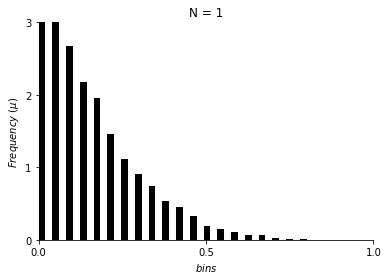

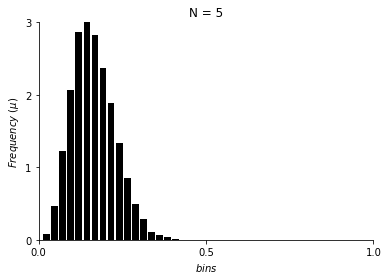

In [ ]:
sampleSize = 10000
bins = 20
N_array = [1, 5]
for N in N_array:
    means = jax.vmap(calcMean, in_axes=(0, None), out_axes=0)
    out = means(keys, N)
    plot_convolutionHist(out, N, sampleSize, bins)

In [ ]:
from ipywidgets import interact


@interact(N_value=(1, 10))
def generate_random(N_value):
    sampleSize = 100000
    bins = 20
    means = jax.vmap(calcMean, in_axes=(0, None), out_axes=0)
    out = means(keys, N_value)
    plot_convolutionHist(out, N_value, sampleSize, bins)